<a href="https://colab.research.google.com/github/strawndri/Edutech-projeto_final/blob/main/Notebooks/analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importações**

## *1.1 Bibliotecas*

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

## *1.2 Base de Dados*

In [5]:
dataset = pd.read_csv('https://www.educacao.pr.gov.br/sites/default/arquivos_restritos/files/documento/2021-11/edutech_comparativos_metricas.csv', sep=';')
dataset.head()

,Ano Censo,Número de Vagas Oferecidas,Número de Tipo de Ingressos,Número de Matrículas,Número de Concluintes,Número de Inscritos,Número de Cursos,Nome Região
0,2017,6075252.0,2135126.0,6529681,947606,14605840.0,33522.0,BRASIL
1,2017,554885.0,208370.0,607357,89956,1306750.0,3072.0,CENTRO-OESTE
2,2017,1138928.0,441493.0,1447248,188730,3804497.0,6715.0,NORDESTE
3,2017,383771.0,143622.0,473716,64851,1367659.0,2513.0,NORTE
4,2017,3086636.0,1026159.0,3003075,458824,6516557.0,14861.0,SUDESTE


# **2. Funções e outras Determinações**

In [6]:
# paleta de cores utilizada nos gráficos
palette = ['#F27C91', '#D73739', '#ED984B', '#F5E342', '#3AAE82', '#3A8EAD', '#69519E']

In [7]:
# salvando os nomes antigos para serem utilizados futuramente
columns = []
for item in dataset.columns:
  columns.append(item.replace('Número de', ''))

In [8]:
# Função que determina as configurações básicas de todos os gráficos

# width e height: comprimento e altura;
# title: título;
# ytitle: determina a altura do título no eixo y.

def plot_config(width, height, title, ytitle=0.95):
  sns.set_style('darkgrid')
  plt.figure(figsize=(width, height))
  plt.suptitle(title, y=ytitle, fontsize=18)

In [9]:
# Função que apresenta diferentes gráficos de curva para comparação

# title: título;
# x: determinação do eixo x;
# y: determinação do eixo y (recebe diferentes valores);
# hue: especifica qual será o colorcode conforme a coluna do dataframe;
# data: seleção de dataframe.

def comparing_results1(title, x, *y, hue, data):

  total = len(y)
  plot_config(18, 24, title, 1.02)

  for i, item in enumerate(y):

    if (i == 0):
      ax = plt.subplot(total, 2, i+1)
    else:
      plt.subplot(total, 2, i+1)

    plt.tight_layout(h_pad=3.0) # espaçamento entre os gráficos
    plt.title(columns[i + 1], fontsize=14)

    sns.lineplot(x=x, y=item, hue=hue, data=data, palette=palette)

    plt.xlabel(x.split('_')[0].title(), fontsize=12)
    plt.ylabel(columns[i + 1], fontsize=12)

    plt.legend(loc='upper right', fontsize='10')

In [10]:
# Função que une dados para a análise comparativa de suas curvas

# title: título;
# x: determinação do eixo x;
# y1 e y2: determinação dos eixos y;
# data: seleção de dataframe.

def comparing_results2(title, x, *y, data):
  
  plot_config(21, 7, title)

  legend = []

  for i, item in enumerate(y):
    sns.lineplot(x=x, y=item, data=data, color=palette[-i])
    legend.append(item.replace('_', ' ').title())

  plt.xlabel(x.split('_')[0].title(), fontsize=12)
  plt.ylabel('Taxa de Valores', fontsize=12)
  plt.legend(legend, loc='upper right', fontsize='16')

In [11]:
# Função que ordena os valores

# values_list: seleciona a coluna que será ordenada
# item: faz a ligação entre a lista já ordenada e outra coluna do dataframe

def ordering_values(values_list, item):
  return dataset.sort_values(values_list)[item]

In [12]:
# Função que apresenta um gráfico de barras

# title: título;
# x: determinação do eixo x; 
# y: determinação do eixo y; 
# xlabel: nome do eixo x;
# ylabel: nome do eixo y;
# data: seleção do dataframe.

def set_barplot(title, x, y, xlabel, ylabel, data):
  plot_config(21, 7, title)
  sns.barplot(x=regiao_matriculas, y=y, data=data, palette=palette);
  plt.xlabel(xlabel, fontsize=12)
  plt.ylabel(ylabel, fontsize=12)

# **3. Tratamento de Dados**

## *3.1 Removendo células Not a Number (NaN)*

> Dados **NaN (Not a Number)** indicam valores que foram perdidos e que não são representados, isto é, tratam-se de valores indefinidos. É importante que exista um tratamento destes dados, visto que podem ocasionar problemas durante a análise.



In [13]:
# dados antes da atualização
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano Censo                    57 non-null     int64  
 1   Número de Vagas Oferecidas   55 non-null     float64
 2   Número de Tipo de Ingressos  46 non-null     float64
 3   Número de Matrículas         57 non-null     int64  
 4   Número de Concluintes        57 non-null     int64  
 5   Número de Inscritos          55 non-null     float64
 6   Número de Cursos             54 non-null     float64
 7   Nome Região                  57 non-null     object 
dtypes: float64(4), int64(3), object(1)
memory usage: 3.7+ KB


In [14]:
# tratamento de células NaN:
# o laço de repetição reconhece cada coluna do dataset;
# encontra-se o índice e depois o valor da lista;
# analisa se é NaN (caso seja, o valor será alterado para 0).
for column in dataset:
  for i, item in enumerate(dataset[column]):
    if (pd.isnull(item)):
      dataset.loc[i, column] = 0

# dados pós atualização
# obs: não há mais celulas NaN
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ano Censo                    57 non-null     int64  
 1   Número de Vagas Oferecidas   57 non-null     float64
 2   Número de Tipo de Ingressos  57 non-null     float64
 3   Número de Matrículas         57 non-null     int64  
 4   Número de Concluintes        57 non-null     int64  
 5   Número de Inscritos          57 non-null     float64
 6   Número de Cursos             57 non-null     float64
 7   Nome Região                  57 non-null     object 
dtypes: float64(4), int64(3), object(1)
memory usage: 3.7+ KB


## *3.2 Renomeando as colunas (removendo acentos e espaços)*

In [15]:
new_columns = {
    'Ano Censo' : 'ano_censo', 
    'Número de Vagas Oferecidas' : 'vagas_oferecidas',
    'Número de Tipo de Ingressos' : 'tipo_ingressos', 
    'Número de Matrículas' : 'matriculas',
    'Número de Concluintes' : 'concluintes', 
    'Número de Inscritos' : 'inscritos', 
    'Número de Cursos' : 'cursos',
    'Nome Região' : 'regiao'
}

# subtituição dos nomes de cada coluna a partir do dicionario "new_columns"
dataset = dataset.rename(columns = new_columns)
dataset.head()

,ano_censo,vagas_oferecidas,tipo_ingressos,matriculas,concluintes,inscritos,cursos,regiao
0,2017,6075252.0,2135126.0,6529681,947606,14605840.0,33522.0,BRASIL
1,2017,554885.0,208370.0,607357,89956,1306750.0,3072.0,CENTRO-OESTE
2,2017,1138928.0,441493.0,1447248,188730,3804497.0,6715.0,NORDESTE
3,2017,383771.0,143622.0,473716,64851,1367659.0,2513.0,NORTE
4,2017,3086636.0,1026159.0,3003075,458824,6516557.0,14861.0,SUDESTE


# **4. Análise de Dados**

## *4.1 Taxas de crescimento ou decaimento ano a ano para todas as regiões do Brasil*

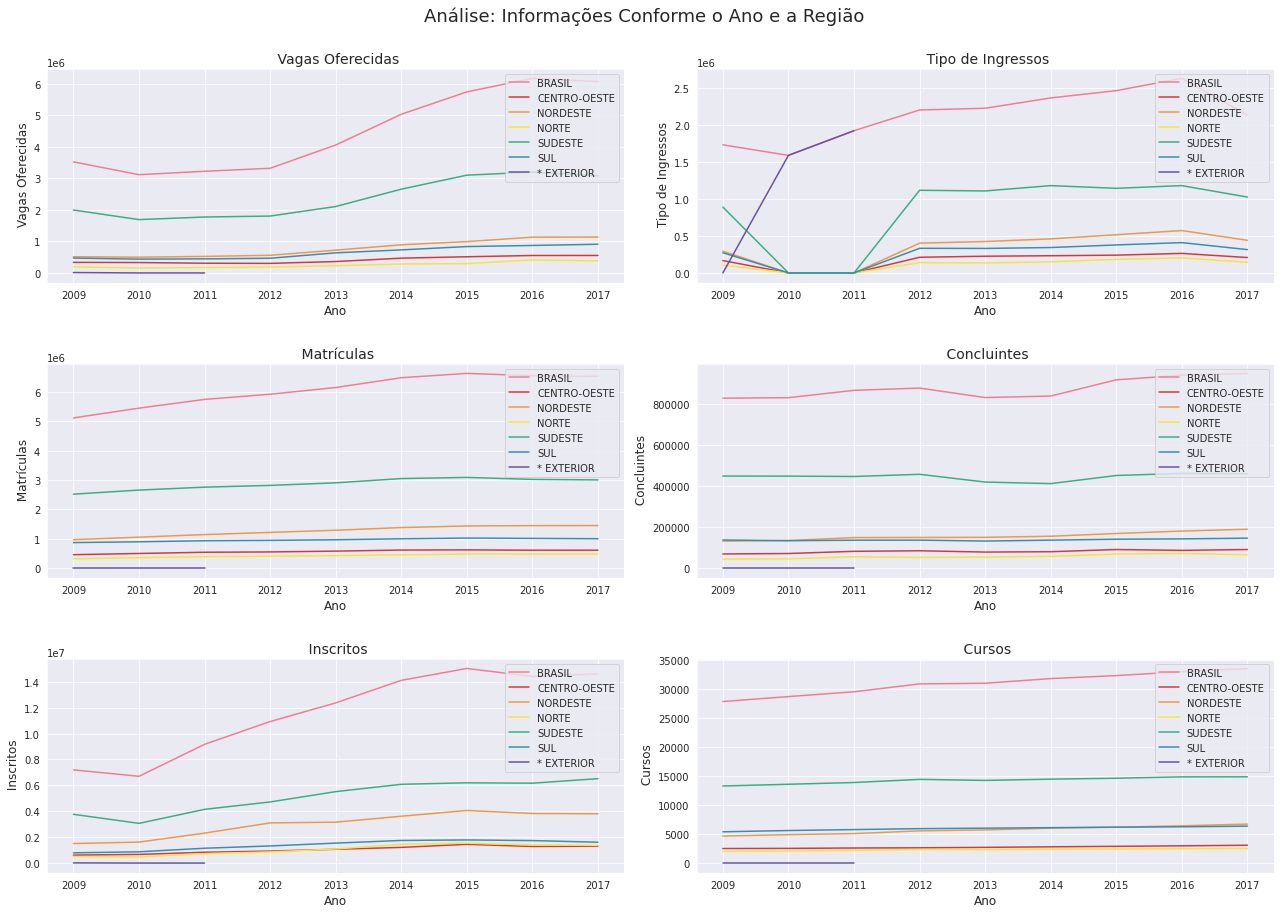

In [16]:
comparing_results1('Análise: Informações Conforme o Ano e a Região',
               'ano_censo', 'vagas_oferecidas', 'tipo_ingressos',
               'matriculas', 'concluintes', 'inscritos', 'cursos', hue='regiao', data=dataset);

### **Conclusão**

#### Vagas Oferecidas
- Houve um decréscimo na região Sudeste no ano de 2010;
- Todas as regiões tiveram um número de vagas quase constante entre 2010 e 2012;
- A região Sudeste teve a maior taxa de vagas durante todos os anos.

#### Tipo de Ingressos
- O número de tipo de ingressos no exterior cresceu consideravelmente entre 2009 e 2011;
- Região Sudeste possui o maior número em todos os anos;
- Não há dados entre 2010 e 2011, exceto no exterior.

#### Matrículas
- A taxa de matrículas, de certa forma, mantive-se constante em todas as regiões;
- Região Sudeste teve o maior número de matrículas em todos os anos.

#### Concluintes
- O número de concluintes manteve-se quase constante em todas as regiões;
- Entre 2012 e 2014 houve um decaimento de concluintes na região Sudeste;

#### Inscritos
- As regiões com números mais elevados de inscritos são: Sudeste e Nordeste.

#### Cursos
- O número de cursos manteve-se equilibrado em todos os anos;
- A região Sudeste teve mais cursos do que as outras (em todos os anos).

## *4.2 Número de vagas oferecidas por região ano a ano*

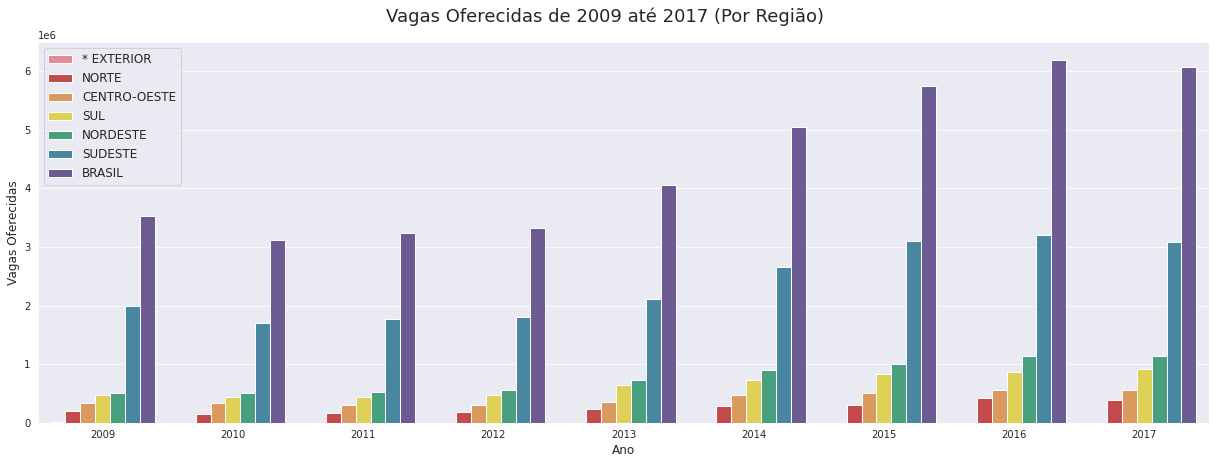

In [17]:
# ordenando a coluna de vagas oferecidas
new_hue = ordering_values('vagas_oferecidas', 'regiao')

# apresentação do gráfico
plot_config(21, 7, 'Vagas Oferecidas de 2009 até 2017 (Por Região)')
sns.barplot(x='ano_censo', y='vagas_oferecidas', 
          hue=new_hue, palette=palette, data=dataset)

# configurações extras
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Vagas Oferecidas', fontsize=12)
plt.legend(fontsize=12);

### **Conclusão**

- Decréscimo de vagas: 2009-2010 e 2016-2017;
- Região Sudeste conteve o maior número de vagas em todos os anos;
- Houveram menos vagas na região Norte em todos os anos;
- A taxa de vagas referentes ao exterior foi mínima, nem sendo aparente no gráfico. 

## *4.3 Relação entre vagas e o número de ingressos*

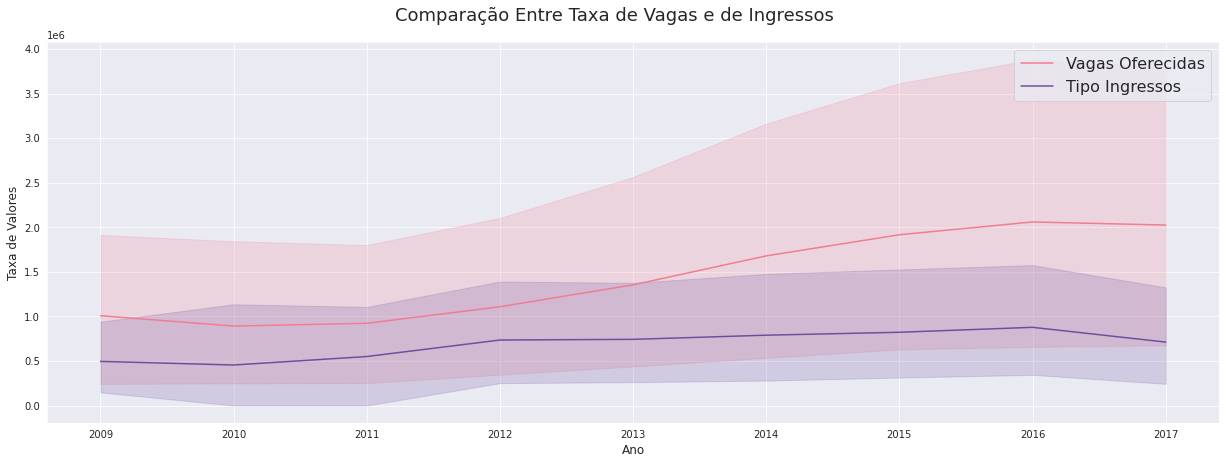

In [23]:
comparing_results2('Comparação Entre Taxa de Vagas e de Ingressos',
                  'ano_censo', 'vagas_oferecidas', 'tipo_ingressos', data=dataset);

### **Conclusão**

- O número de ingressos segue o crescimento e o decaimento conforme a taxa de vagas oferecidas. Entretanto, a quantidade do primeiro permanece inferior ao segundo durante todos os anos;

- Entre os anos de 2009 e 2010 houve um decaimento no número de vagas e de ingressos — assim como entre os anos de 2016 e 2017.

## *4.4 Crescimento no número de matrículas por região*

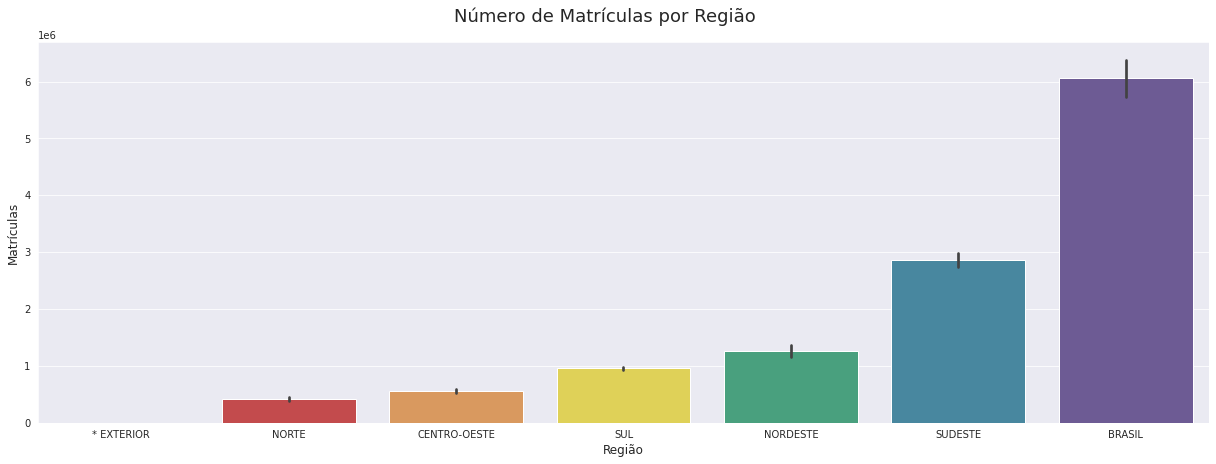

In [19]:
# ordenando a coluna de matrículas
regiao_matriculas = ordering_values('matriculas', 'regiao')

# apresentação do gráfico
set_barplot('Número de Matrículas por Região', regiao_matriculas, 
            'matriculas', 'Região', 'Matrículas', dataset);

### **Conclusão**

- A região que, certamente, possui o maior número de matrículas é a Sudeste;
- Nordeste e Sul têm valores aproximados;
- As taxas mais inferiores estão presentes na região Centro-Oeste, Norte e também no Exterior.

## *4.5 Número de concluintes em cada região*

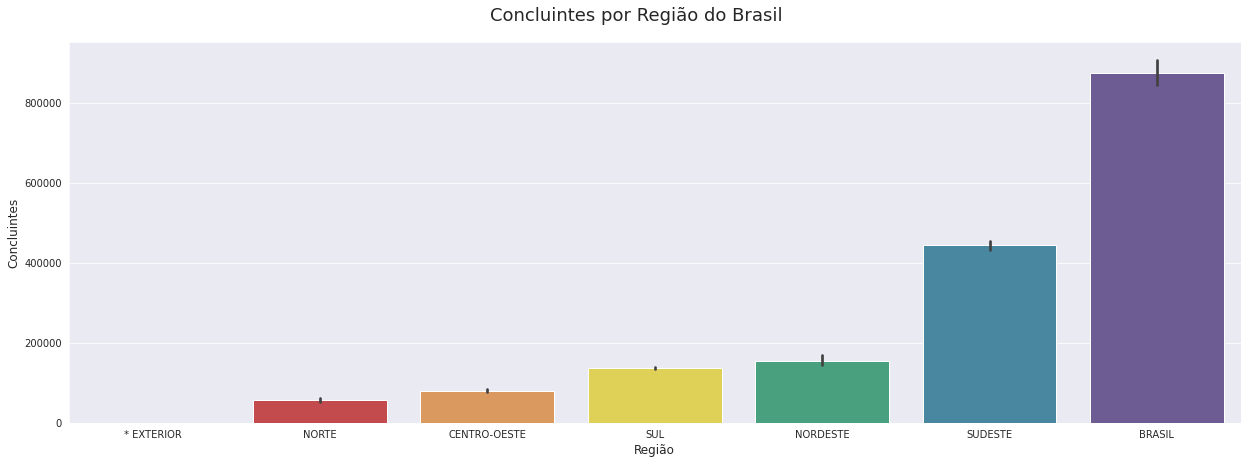

In [20]:
# ordenando a coluna de concluintes
regiao_concluintes = ordering_values('concluintes', 'regiao')

# apresentação do gráfico
set_barplot('Concluintes por Região do Brasil', regiao_concluintes, 'concluintes', 
            'Região', 'Concluintes', dataset)

### **Conclusão**

- Região Sudeste mantém-se com os maiores valores;
- Os valores intermediários encontram-se no Nordeste e no Sul;
- As menores quantidades de concluintes estão, respectivamente, no Centro-Oeste, Norte e no Exterior.

## *4.6 Comparação: número de inscritos e o número de matrículas*

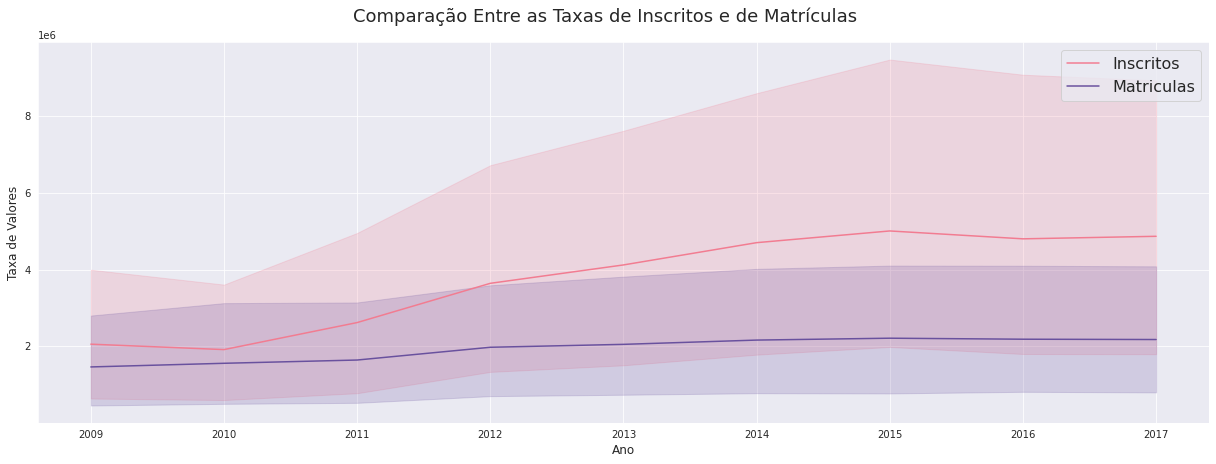

In [21]:
comparing_results2('Comparação Entre as Taxas de Inscritos e de Matrículas',
                  'ano_censo', 'inscritos', 'matriculas', data=dataset);

### **Conclusão**

- Inicialmente, entre 2009 e 2010, tanto os números de inscritos, quanto os de matrículas permanecem, de certa forma, constantes; 
- Ao passar dos anos, é possível observar que a taxa de matrículas não segue o mesmo ritmo que a de inscritos, uma vez que a primeira não sofre uma variação considerável, diferentemente da segunda;
- Percebe-se que entre 2009-2010 e 2015-2016 houve decaimento no número de inscritos.

## *4.7 Número de cursos ofertados na região e seus impactos no aumento de inscritos e/ou número de matrículas*

**Atenção: O gráfico abaixo apresenta uma relação de proporção entre os dados; no lado esquerdo é possível ver a quantidade de cursos disponibilizados e no eixo do lado direito, o número de inscritos (1e7) e de matrículas (1e7)**

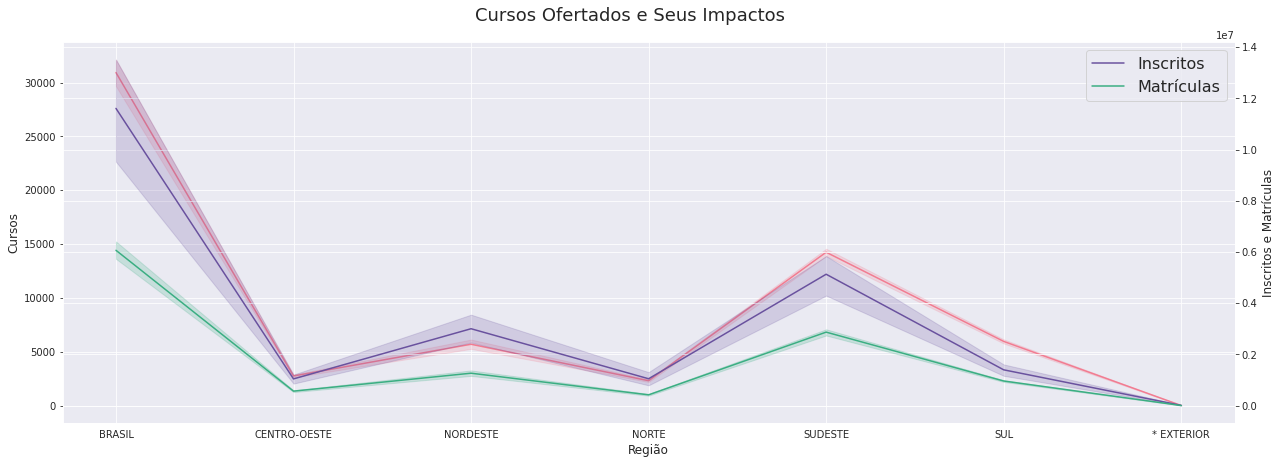

In [24]:
# configurações iniciais do gráfico
plot_config(21, 7, 'Cursos Ofertados e Seus Impactos')

# criação do eixo y1 (lado esquerdo) -> cursos
ax1 = sns.lineplot(x='regiao', y='cursos', data=dataset, color="#F27C91")
plt.ylabel('Cursos', fontsize=12)
plt.xlabel('Região', fontsize=12)

# criação do eixo y2 (lado direito) -> inscritos e matrículas
ax2= plt.twinx(ax1)
ax2 = sns.lineplot(x='regiao', y='inscritos', data=dataset, color="#69519E")
ax3 = sns.lineplot(x='regiao', y='matriculas', data=dataset, color="#3AAE82")
plt.ylabel('Inscritos e Matrículas', fontsize=12)
plt.legend(['Inscritos', 'Matrículas'], fontsize=16);

### **Conclusão**

**Centro-Oeste:** O número de cursos e de inscritos encontram-se em conformidade, porém ambos são superiores à quantidade de matrículas;

**Nordeste:** A disponibilidade de cursos é inferior ao número de inscritos; quantidade de matrículas fica abaixo dos dois;

**Norte:** Há uma proporcionalidade entre inscritos e cursos ofertados, mas também taxa de matrículas que não alcança o mesmo nível;

**Sudeste:** O números de inscritos é próximo da quantidade de cursos e estes dois resultados são superiores à taxa de matrículas;

**Sul:** Em comparação aos outros dois valores, a disponibilidade de cursos é superior. Além disso, a quantidade de inscritos e de matrículas é muito próxima;

**Exterior:** Os três dados possuem valores baixos, não sendo aparentes no gráfico.

De maneira geral, é possível perceber que o número de pessoas matriculadas em cada região não é capaz de superar os valores equivales ao total de inscritos, muito menos ao de cursos ofertados. Além disso, nota-se que os maiores números estão na região Sudeste.

# **5. Conclusão Final**

Assim, por meio de todas as análises acima, foi possível notar determinadas tendências ao longo dos diferentes dados associados aos cursos presenciais de graduação no Brasil entre os anos de 2009 a 2017.

Um primeiro ponto a ser ressaltado é que, em meio aos diversos dados, houve uma determinada região **(Sudeste)**, cujos resultados ultrapassaram o de outros locais, tais como o Nordeste, o Norte, o Centro-Oeste, o Sul e o Exterior.

Nesse viés, é extremamente importante trazer à tona que um dos motivos que contribui para esta discrepância de valores deve-se ao fato da diferença populacional de cada região brasileira. A partir do **Censo de 2010**, realizado pelo **IBGE (Instituto Brasileiro de Geografia e Estatística)**, pode-se observar o total de habitantes por região:

- Sudeste: 85,1 milhões;
- Centro-Oeste: 15,2 milhões; 
- Norte: 17,3 milhões; 
- Nordeste: 56,1 milhões; 
- Sul: 29 milhões.

Não só isso, como é imprescíndivel saber que outro fator para estas taxas é a valorização da região Sudeste em detrimento das demais, o que pode ser visto, por exemplo, a partir dos investimentos urbanísticos, tecnológicos, trabalhistas, educacionais, etc.

Por fim, notou-se, por meio das análises temporais, que houve um crescimento de vagas, ingressos, matrículas, concluintes e inscritos gradual conforme a passagem dos anos, o que é um ponto positivo, uma vez que é instensamente necessário o acesso às universidades brasileiras pela população.